In [119]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
from scipy.stats import norm, skew, stats
import statsmodels.api as sm


In [120]:
# Load train and test data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train shape: ', train.shape) # ((1460, 81))
print('test shape: ', test.shape) # (1459, 80)
combine = pd.concat((train, test), axis=0)

train shape:  (1460, 81)
test shape:  (1459, 80)


In [121]:
combine.shape

(2919, 81)

### Exploratory Data Analysis

In [82]:
pd.set_option('display.max_columns', None)
combine.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [83]:
# Summarize continuous variables
combine.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [84]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [1293]:
# combine_categorical = combine.select_dtypes(include='object').columns

### Handling of Missing Data

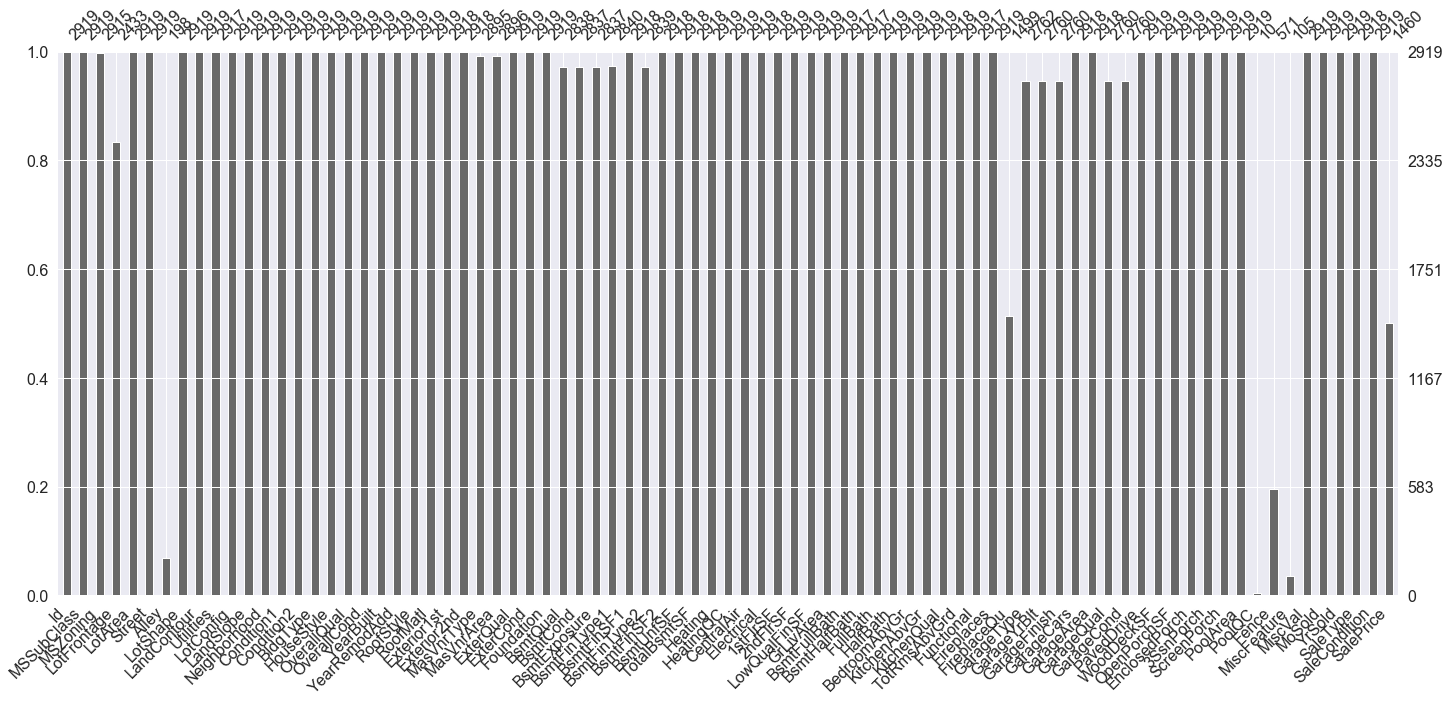

In [85]:
# Visualizing Missing Data
msno.bar(combine, labels=True)

In [86]:
missing_sum = pd.DataFrame(combine.isnull().sum().sort_values(ascending=False), columns=['missing rows'])
missing_percent = pd.DataFrame((combine.isnull().sum()/len(combine)*100).sort_values(ascending=False), columns=['percent missing'])
missing_data = pd.concat([missing_sum, missing_percent], axis = 1)
## Select only those features who have atleast 1 NaN value
missing_data = missing_data[missing_data['missing rows'] > 0]
missing_data


,missing rows,percent missing
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


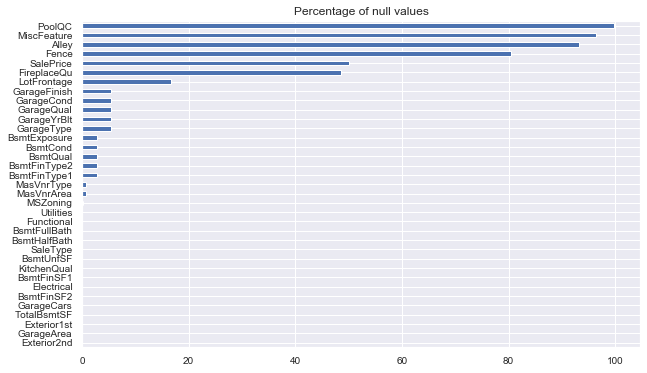

In [91]:
missing_data['percent missing'].sort_values().plot(kind='barh', figsize=(10,6), fontsize=10, title="Percentage of null values")
plt.show()

Text(0.5, 1.02, 'Correlation matrix')

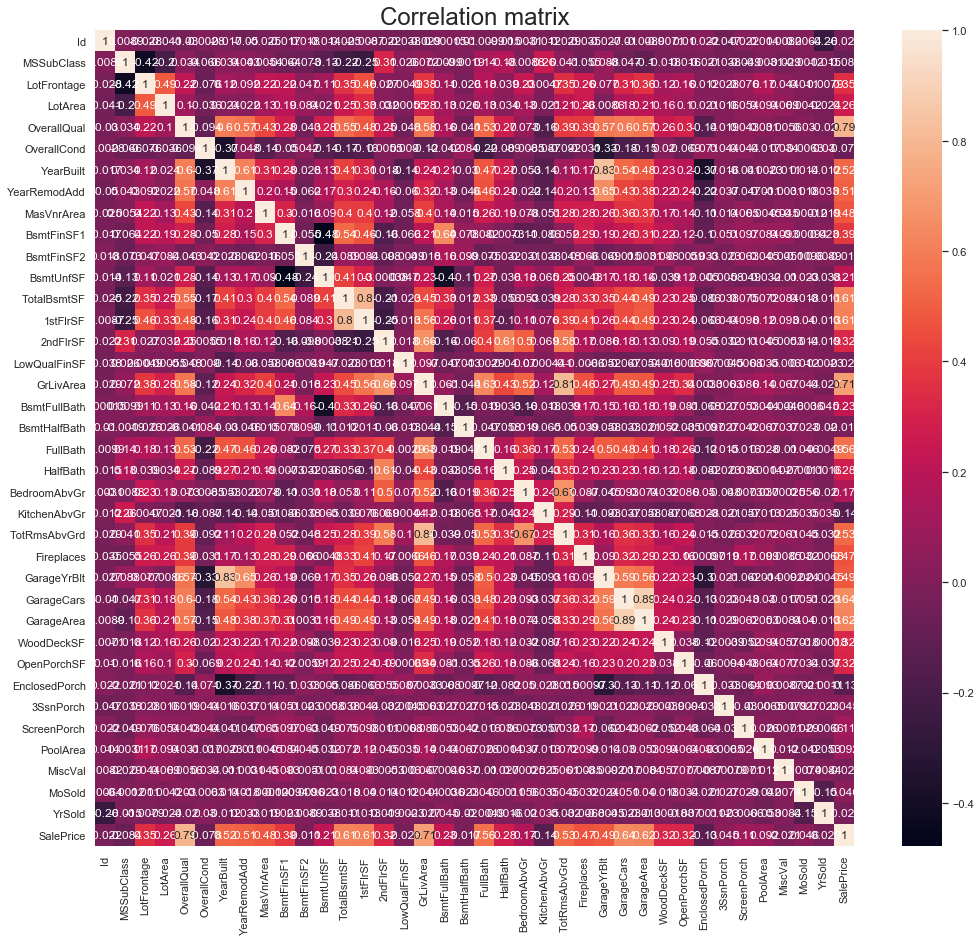

In [92]:
var_corr = combine.corr()
f, ax = plt.subplots(figsize=(17, 15))
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True).set_title('Correlation matrix', fontsize=24, y=1.02)


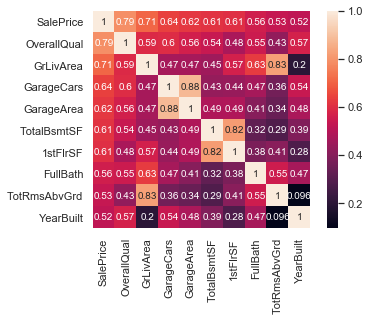

In [125]:
n = 10 #number of variables for heatmap
sig10_corr = combine.corr().nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[sig10_corr].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, annot=True, square=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [95]:
price_corr.SalePrice
pd.DataFrame(price_corr.SalePrice)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [126]:
# The following are columns that have more than 10% missing data, we should consider deleting 
# Since PoolQC is poorly correlated with SalePrice, we can be safely delete it
# MiscFeature, Alley are not aspects we think about when buying a house, and will not be missed if deleted
# Since deleting MiscFeature, will also delete MiscVal
# Delete 3SsnPorch since it is poorly corr w/ SalePrice?
# Delete Id since it's irrelevant to this data set

del_features = ['Alley', 'Id', 'MiscFeature', 'MiscVal', 'PoolQC']

# Function to delete features that are not important
def delete_feature(df, features):
    for feature in features:
        df.drop(feature, axis=1, inplace=True)
    return df

combine = delete_feature(combine, del_features)
print(combine.shape)

(2919, 76)


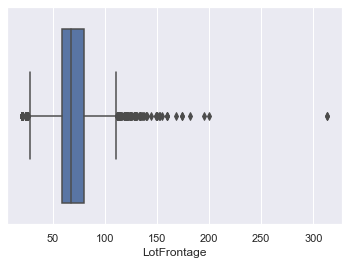

In [129]:
# Check LotFrontage for outliars to determine if we should use mean or median to impute
# missing values
sns.boxplot(combine['LotFrontage'])
# Since there are outliars, the mean would be skewed. We will impute with the median instead
combine['LotFrontage'].fillna(combine['LotFrontage'].median(), inplace=True)


In [98]:
# Impute missing Electrical value with mode value
mode_electrical = combine.Electrical.value_counts().idxmax() # find index of max value
combine['Electrical'].fillna(mode_electrical, inplace=True)


In [99]:
# For the remaining categorical features with missing values, 
# we impute the missing values with string "None"
def fill_None(df, features):
    for feature in features:
        df[feature] = df[feature].fillna('None')
    return df

fillNone_features = ['Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual']
combine = fill_None(combine, fillNone_features)


In [100]:
# Fill missing values in continuous features with 0
def fill_zero(df, features):
    for feature in features:
        df[feature] = df[feature].fillna(0)
    return df

fillZero_features = ['GarageYrBlt', 'GarageCars', 'GarageArea','MasVnrType','MasVnrArea']
combine = fill_zero(combine, fillZero_features)


In [101]:
combine.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,12,2008,WD,Normal,250000.0


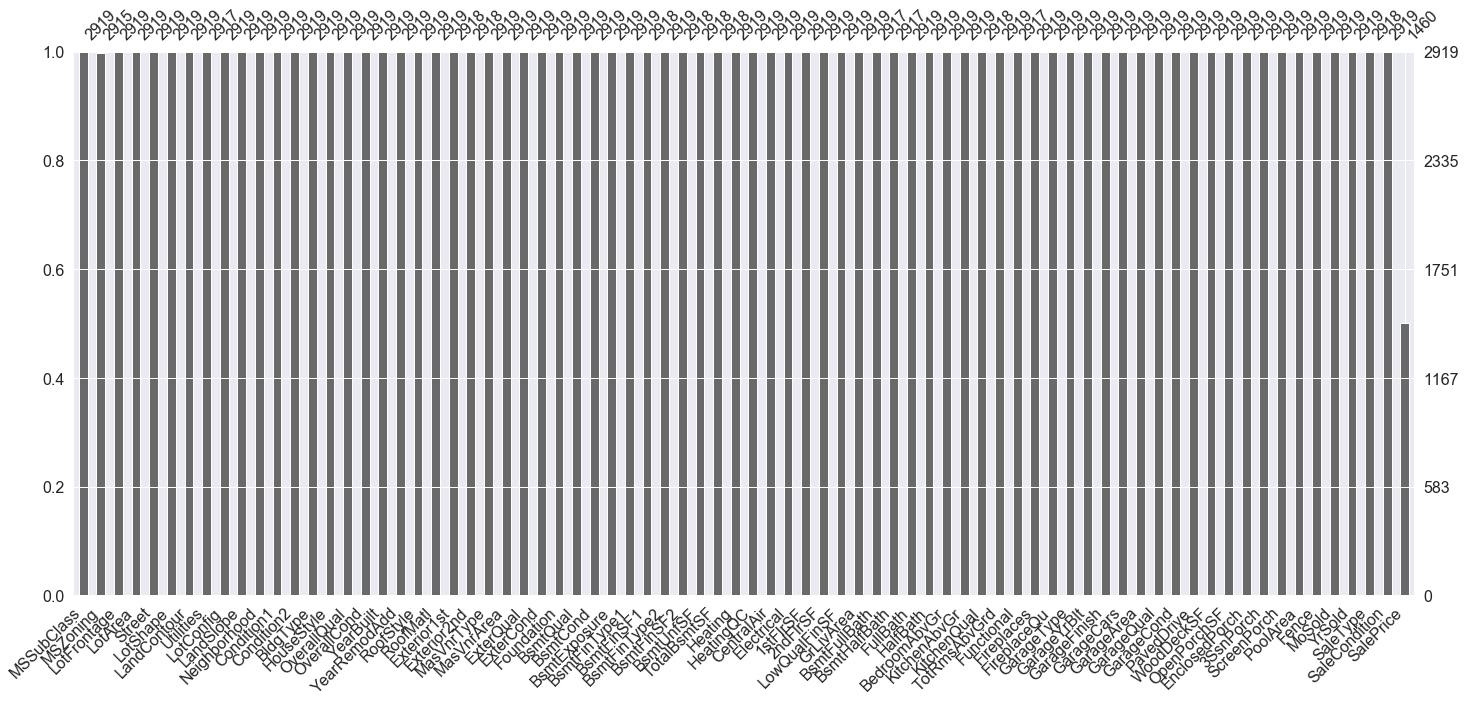

In [102]:
msno.bar(combine, labels=True)

In [1480]:
# GarageCar and GarageArea are pretty similar, may consider dropping one

### Handling of Outliers and Normality
- We'll explore each of the following features for outliers and normality: SalePrice, GrLivArea, and TotalBasmtSF

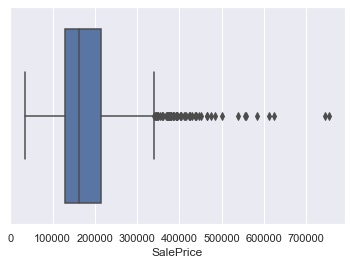

In [103]:
sns.boxplot(combine['SalePrice'])


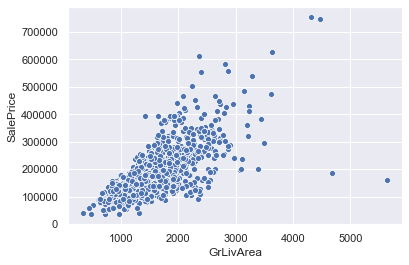

In [104]:
sns.scatterplot(combine['GrLivArea'], combine['SalePrice'])
# The two points with highest GrLivArea are not aligned with the general plot

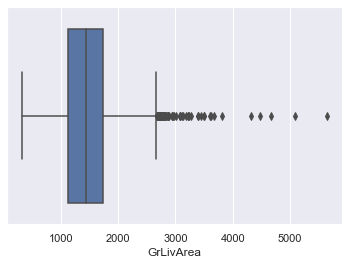

In [105]:
sns.boxplot(combine['GrLivArea'])

In [106]:
combine['GrLivArea'].sort_values(ascending=False)


1298    5642
1089    5095
523     4676
1182    4476
691     4316
        ... 
1325     492
916      480
1100     438
638      407
533      334
Name: GrLivArea, Length: 2919, dtype: int64

In [107]:
# Delete rows with outliers
combine = combine.loc[combine['GrLivArea'] < 4500]

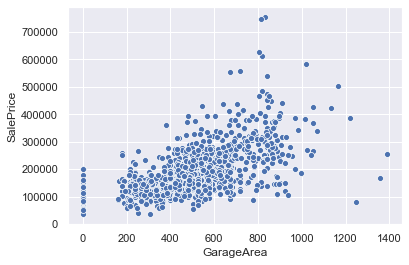

In [108]:
sns.scatterplot(combine['GarageArea'], combine['SalePrice'])


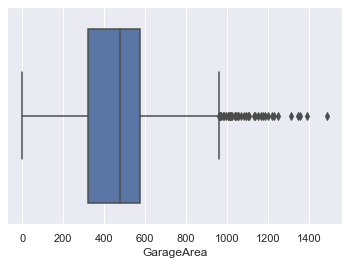

In [109]:
sns.boxplot(combine['GarageArea'])

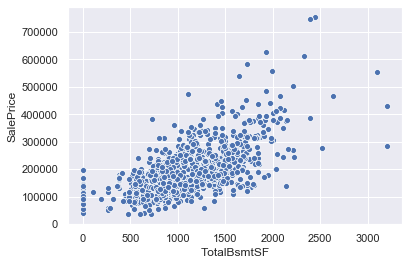

In [110]:
sns.scatterplot(combine['TotalBsmtSF'], combine['SalePrice'])

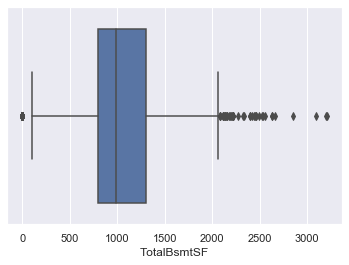

In [111]:
sns.boxplot(combine['TotalBsmtSF'])

In [1628]:
# combine['TotalBsmtSF'].sort_values(ascending=False)
# combine = combine.loc[combine['GrLivArea'] < 3000]
# Made score really negative

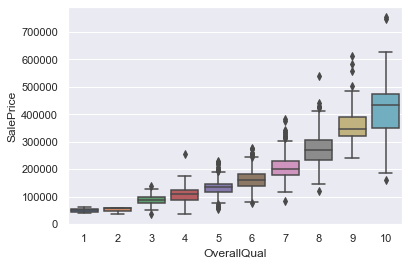

In [127]:
sns.boxplot(combine['OverallQual'], combine['SalePrice'])

nan

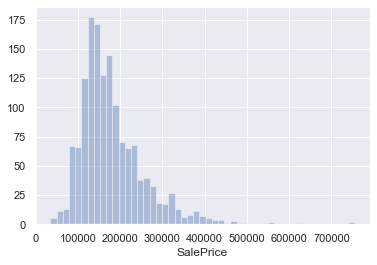

In [112]:
# # histogram and normal probability plot
sns.distplot(combine['SalePrice'], norm_hist=False, kde=False)
skew(combine['SalePrice'])


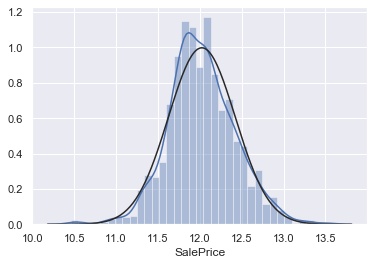

In [113]:
combine['SalePrice'] = np.log(combine['SalePrice'])
sns.distplot(combine['SalePrice'], fit=norm)

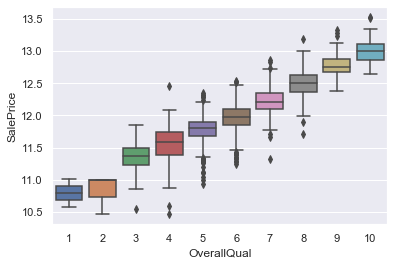

In [114]:
sns.boxplot(combine['OverallQual'], combine['SalePrice'])

In [1616]:
# sns.distplot(combine['GrLivArea'], fit=norm)
# skew(combine['GrLivArea'])

In [1589]:
# combine['GrLivArea'] = np.log(combine['GrLivArea'])
# sns.distplot(combine['GrLivArea'], fit=norm)

In [1617]:
# sns.distplot(combine['TotalBsmtSF'], fit=norm)
# skew(combine['TotalBsmtSF'])

In [1591]:
# combine['TotalBsmtSF'] = np.log1p(combine['TotalBsmtSF'])
# sns.distplot(combine['TotalBsmtSF'], fit=norm)

### Feature Engineering

In [128]:
# Usually we talk about the total area (sqft) of the house rather than individual areas.
# Create a new feature to sums up all the areas to get the total area
# GrLivA = 1stFlrSF + 2ndFlrSF, drop?
def feat_engineering(df):
    df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']

    # Total Square Footage
    df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + df['3SsnPorch'] + df.ScreenPorch
    
    # Total Bathrooms
    df['TotalBathrooms'] = df.FullBath + .5*df.HalfBath + df.BsmtFullBath + .5*df.BsmtHalfBath

    # The Year features can be combined to give us the age of the house when it was sold instead
    # Drop MoSold, YrSold?
#     df['Age'] = df['YrSold'] - df['YearBuilt']

    return df

combine = feat_engineering(combine)
# test = feat_engineering(test)

# Delete features no longer needed
del_features = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'OpenPorchSF', \
                'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'EnclosedPorch', \
                '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold']
combine = delete_feature(combine, del_features)
print(combine.shape)


(2919, 65)


In [116]:
# Heating Quality and Condition

# Function replaces strings with ordinal values

def replace_ordinal(df, features):
    for feature in features:
        df[feature].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    return df

features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond'] 
combine = replace_ordinal(combine, features)


In [1692]:
# combine.PoolQC.unique()

In [1693]:
# Finished Basement 2 Rating
def replace_ordinal2(df, features):
    for feature in features:
        df[feature].replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
    return df

features = ['BsmtFinType1', 'BsmtFinType2'] 
combine = replace_ordinal2(combine, features)


In [117]:
def replace_ordinal3(df):
    df.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

    df.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

    df.HouseStyle.replace({'2Story': 2, '1Story': 1}, inplace=True)

    df.BsmtExposure.replace({'No':0, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

    df.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

    df.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

    # Fill NA values with zeroes
    df = fill_zero(df, ['LotShape', 'LandSlope', 'BsmtExposure', 'GarageFinish', 'PavedDrive'])
    return df
# central air
combine = replace_ordinal3(combine)


In [118]:
print(combine.shape)
combine.head()

(2916, 65)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,Fence,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBathrooms
0,60,RL,65.0,8450,Pave,1,Lvl,AllPub,Inside,3,CollgCr,Norm,Norm,1Fam,2,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,0,GLQ,706.0,Unf,0.0,150.0,GasA,5,Y,SBrkr,0,3,1,4.0,8,Typ,0,0,Attchd,2003.0,2,2.0,548.0,3,3,3,0,0,None,WD,Normal,12.247694,2566.0,61,3.5
1,20,RL,80.0,9600,Pave,1,Lvl,AllPub,FR2,3,Veenker,Feedr,Norm,1Fam,1,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,ALQ,978.0,Unf,0.0,284.0,GasA,5,Y,SBrkr,0,3,1,3.0,6,Typ,1,3,Attchd,1976.0,2,2.0,460.0,3,3,3,298,0,None,WD,Normal,12.109011,2524.0,0,2.5
2,60,RL,68.0,11250,Pave,2,Lvl,AllPub,Inside,3,CollgCr,Norm,Norm,1Fam,2,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,GLQ,486.0,Unf,0.0,434.0,GasA,5,Y,SBrkr,0,3,1,4.0,6,Typ,1,3,Attchd,2001.0,2,2.0,608.0,3,3,3,0,0,None,WD,Normal,12.317167,2706.0,42,3.5
3,70,RL,60.0,9550,Pave,2,Lvl,AllPub,Corner,3,Crawfor,Norm,Norm,1Fam,2,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,0,ALQ,216.0,Unf,0.0,540.0,GasA,4,Y,SBrkr,0,3,1,4.0,7,Typ,1,4,Detchd,1998.0,1,3.0,642.0,3,3,3,0,0,None,WD,Abnorml,11.849398,2473.0,307,2.0
4,60,RL,84.0,14260,Pave,2,Lvl,AllPub,FR2,3,NoRidge,Norm,Norm,1Fam,2,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,GLQ,655.0,Unf,0.0,490.0,GasA,5,Y,SBrkr,0,4,1,4.0,9,Typ,1,3,Attchd,2000.0,2,3.0,836.0,3,3,3,192,0,None,WD,Normal,12.429216,3343.0,84,3.5


In [1696]:
combine.to_csv('combine.csv', index=False)
